   # VIOLÊNCIA DOMÉSTICA NO ESTADO DE PERNAMBUCO

## IMPORTANDO AS BIBLIOTECAS

Bibliotecas do projeto

In [1]:
#pip install openpyxl

In [2]:
#pip install matplotlib

In [3]:
#pip install pandas

In [4]:
#pip install statsmodels

Instalando e importante a biblioteca pandas que servirá como base para manipulação dos dados, ou seja, a biblioteca será utilizada para realização da limpeza, pré-processamento e engenharia de atributos, alem de auxiliar na analise exploratória e criação de gráficos simples.

In [5]:
import pandas as pd

In [6]:
import statsmodels.tsa.api as tsa

## LENDO O ARQUIVO EXCEL

In [7]:
df = pd.read_excel('../Data/MICRODADOS_DE_VIOLÊNCIA_DOMÉSTICA_JAN_2015_A_AGO_2022.xlsx')

In [8]:
df

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
0,AFOGADOS DA INGAZEIRA,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
1,AFRANIO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,5) 30-34,1
2,AFRANIO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,4) 25-29,1
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,2) 12-17,1
4,ALAGOINHA,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
...,...,...,...,...,...,...,...,...
253698,SAO JOSE DO BELMONTE,SERTÃO,MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,(vazio),1
253699,SAO JOSE DO EGITO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,3) 18-24,1
253700,SURUBIM,AGRESTE,PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA...,2022-08-31,2022,FEMININO,6) 35-64,1
253701,VERDEJANTE,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,6) 35-64,1


A leitura do arquivo foi feita utilizando a função read_excel, disponivel na biblioteca pandas

## VERIFICAÇÃO DOS TIPOS COLUNÁRES

In [9]:
df.dtypes

MUNICÍPIO DO FATO              object
REGIAO GEOGRÁFICA              object
NATUREZA                       object
DATA DO FATO           datetime64[ns]
ANO                             int64
SEXO                           object
IDADE SENASP                   object
TOTAL DE ENVOLVIDOS             int64
dtype: object

A feature "DATA DO FATO" ja está em datetime e os dados númericos estão como int64, não sendo necessário ajustes, vale salientar que a feature de idade é uma feature categórica, pois encontra-se dividida em intervalos de idade. As demais features encontram-se como object podendo ser mudadas para categórica a depender do objetivo do estudo, para nosso caso optamos por manter como object.

### ANÁLISE DOS VALORES COLUNARES

##### # IDADE SENASP

In [10]:
df['IDADE SENASP'].value_counts()

6) 35-64         92515
3) 18-24         48331
4) 25-29         41295
5) 30-34         41077
2) 12-17         11919
7) 65 OU MAIS     9693
1) 00-11          5959
(vazio)           2914
Name: IDADE SENASP, dtype: int64

Necessário fazer ajustes na strig. Por opção a equipe escolheu deixar os intervalos fechados no modelo XX-YY, onde XX é a idade inicial do intervalo e YY a idade final. Os ajustes seram realizados mais a frente

Como aparece dados com a string (vazio) vamos trocar a string para não informado

In [11]:
df['MUNICÍPIO DO FATO'].value_counts()

RECIFE                     42592
JABOATAO DOS GUARARAPES    15161
CARUARU                    13802
OLINDA                     13428
PETROLINA                  12257
                           ...  
GRANITO                      101
QUIXABA                       99
INGAZEIRA                     97
MARAIAL                       91
ITACURUBA                     82
Name: MUNICÍPIO DO FATO, Length: 185, dtype: int64

As cetegorias mostram-se já pré-processadas, não sendo necessário ajustes

In [12]:
df['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    92689
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            63960
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   33233
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12914
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      12490
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12487
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     8966
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  6724
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                3281
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      2792
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    1397
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     1019
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     975
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 586
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             190
Name: NATUREZA, dtype: in

As cetegorias mostram-se já pré-processadas, não sendo necessário ajustes

In [13]:
df['SEXO'].value_counts()

FEMININO         236810
MASCULINO         16113
DESCONHECIDO        610
NAO INFORMADO       170
Name: SEXO, dtype: int64

Para a feature "SEXO" optou-se por juntar as categorias desconhecido e não informado. 

### Verificando existencia de dados faltantes

In [14]:
df.isnull().count()

MUNICÍPIO DO FATO      253703
REGIAO GEOGRÁFICA      253703
NATUREZA               253703
DATA DO FATO           253703
ANO                    253703
SEXO                   253703
IDADE SENASP           253703
TOTAL DE ENVOLVIDOS    253703
dtype: int64

Não há dados faltantes

## Pré-processamento e Engenharia de Features

##### Ajuste da feature SEXO

In [15]:
def ajuste_sexo (sexo):
    if sexo == 'DESCONHECIDO' or sexo == 'NAO INFORMADO':
        sexo = 'DESCONHECIDO/NAO INFORMADO'
    else:
        sexo = sexo

    return sexo

In [16]:
df['SEXO'] = df['SEXO'].apply(ajuste_sexo)

In [17]:
df['SEXO'].value_counts()

FEMININO                      236810
MASCULINO                      16113
DESCONHECIDO/NAO INFORMADO       780
Name: SEXO, dtype: int64

A aplicação dessas função foi feita com o uso do metodo apply, que aplica a função para cada uma das instâncias do dataframe

##### Ajuste da feature IDADE SENASP

In [18]:
def ajuste_idades(idade):
        if idade == '(vazio)':
                idade = 'Não informado'
        else:
                idade = idade[3:]
                
        return idade

In [19]:
df['IDADE SENASP'] = df['IDADE SENASP'].apply(ajuste_idades)

In [20]:
df['IDADE SENASP'].value_counts()

35-64            92515
18-24            48331
25-29            41295
30-34            41077
12-17            11919
65 OU MAIS        9693
00-11             5959
Não informado     2914
Name: IDADE SENASP, dtype: int64

### Ajuste da feature Natureza

In [21]:
def ajustes_natureza (x):
    x = x[:-33]
    return x 

In [22]:
df['NATUREZA'] = df['NATUREZA'].apply(ajustes_natureza)

##### # Criação uma nova coluna com a informação do mês de ocorrência do fato

A equipe decidiu criar uma feature com as informações do mês de ocorrência do fato para analisar a sazonalidade dos mesmo, para tanto foi extraida, com o auxílio do método .month, da feature "DATA DO FATO" a informação referente ao mês de ocorrência do fato.

In [23]:
df['MÊS DO FATO'] = df['DATA DO FATO'].dt.month

In [24]:
df['MÊS DO FATO']

0         1
1         1
2         1
3         1
4         1
         ..
253698    8
253699    8
253700    8
253701    8
253702    8
Name: MÊS DO FATO, Length: 253703, dtype: int64

## Análise exploratória dos dados

##### Verificando a média de vítimas por fato

aqui utilizamos o método len para contar o numero de features de determinado dataframe

In [25]:
M = (df['TOTAL DE ENVOLVIDOS'].sum())/ (len(df))
M

1.207076778753109

Entendendo que a média de vítimas é bem próximo a 1, resolve-se estudar um pouco mais sobre os casos com mais de uma vítima para entede-los

In [26]:
df['TOTAL DE ENVOLVIDOS'].value_counts().head()

1    220954
2     22500
3      5664
4      2266
5      1075
Name: TOTAL DE ENVOLVIDOS, dtype: int64

In [27]:
(len(df[df['TOTAL DE ENVOLVIDOS'] > 1])/len(df)) * 100

12.908400767826947

Quase 13% dos acidentes envolvem mais de 1 vítima

<AxesSubplot:>

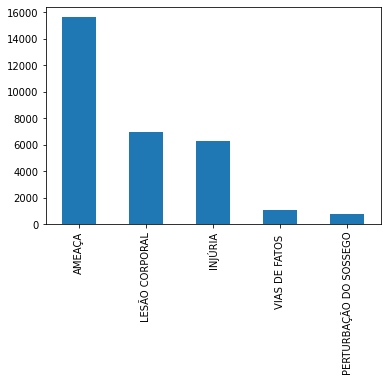

In [28]:
df[df['TOTAL DE ENVOLVIDOS'] > 1]['NATUREZA'].value_counts().head().plot.bar()

## Algumas análises gráficas iniciais

##### # NATUREZA

<AxesSubplot:>

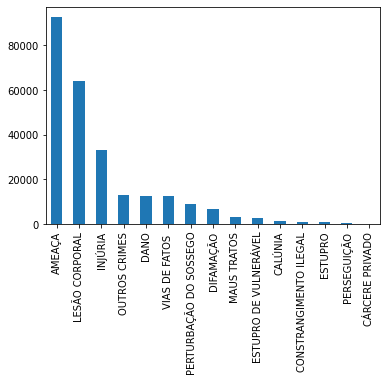

In [29]:
df['NATUREZA'].value_counts().plot.bar()

##### # SEXO

<AxesSubplot:ylabel='SEXO'>

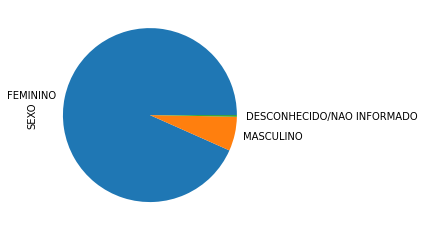

In [30]:
df['SEXO'].value_counts().plot.pie()

##### # IDADE

<AxesSubplot:ylabel='IDADE SENASP'>

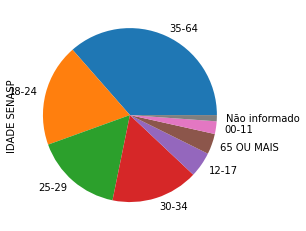

In [31]:
df['IDADE SENASP'].value_counts().plot.pie()

##### # REGIÃO

<AxesSubplot:ylabel='REGIAO GEOGRÁFICA'>

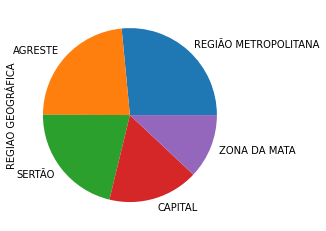

In [32]:
df['REGIAO GEOGRÁFICA'].value_counts().plot.pie()

<AxesSubplot:>

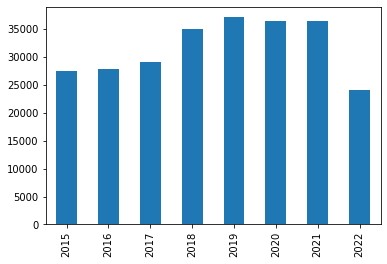

In [33]:
df['ANO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

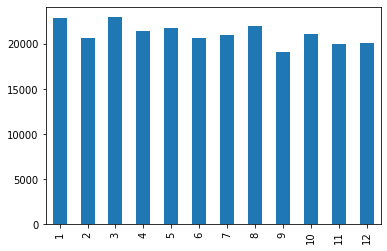

In [34]:
df['MÊS DO FATO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

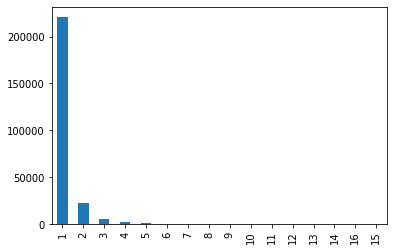

In [35]:
df['TOTAL DE ENVOLVIDOS'].value_counts().plot.bar()

## Criação de um dataset para analise temporal

Para a analise o periodo foi mensal

In [36]:
def ano_mes (data):
    data = str(data)[:7]
    return data

In [37]:
df['ano/mes'] = df['DATA DO FATO'].apply(ano_mes)

In [38]:
df['ano/mes'][0]

'2015-01'

In [39]:
df_temp = df['ano/mes'].value_counts().rename_axis('data').to_frame('N_casos')

In [40]:
df_temp.sort_index(inplace = True)

In [41]:
df_temp

,N_casos
data,
2015-01,2477
2015-02,2440
2015-03,2669
2015-04,2403
2015-05,2366
...,...
2022-04,3264
2022-05,3287
2022-06,2921


<AxesSubplot:xlabel='data'>

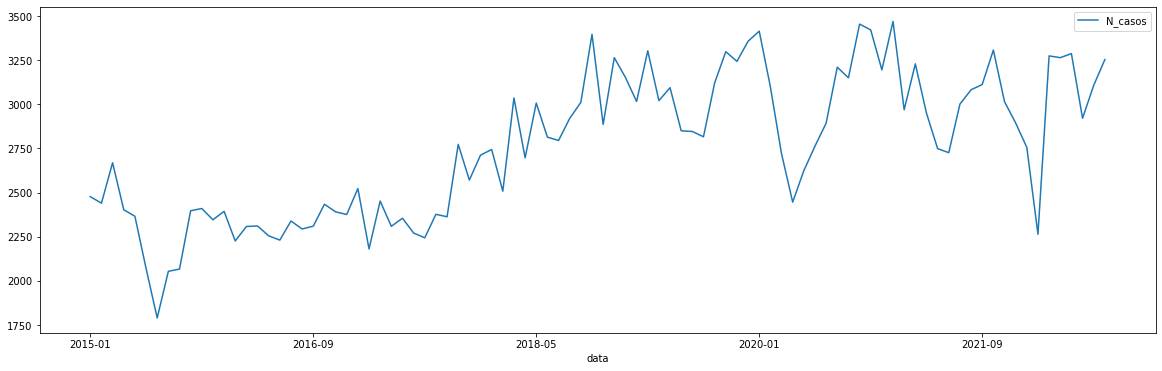

In [42]:
df_temp.plot(figsize=(20,6))

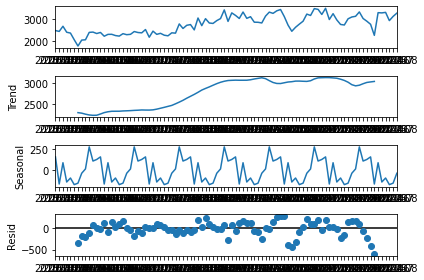

In [43]:
df_decomp = tsa.seasonal_decompose(df_temp, period = 12)
df_decomp.plot();

### Análise dos casos cuja Natureza é AMEAÇA POR VIOLÊNCIA

In [44]:
df_ameaca = df[df['NATUREZA'] == 'AMEAÇA']
df_ameaca

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO,ano/mes
1,AFRANIO,SERTÃO,AMEAÇA,2015-01-01,2015,FEMININO,30-34,1,1,2015-01
4,ALAGOINHA,AGRESTE,AMEAÇA,2015-01-01,2015,FEMININO,35-64,1,1,2015-01
9,BEZERROS,AGRESTE,AMEAÇA,2015-01-01,2015,FEMININO,30-34,1,1,2015-01
12,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA,2015-01-01,2015,FEMININO,18-24,1,1,2015-01
13,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA,2015-01-01,2015,FEMININO,30-34,1,1,2015-01
...,...,...,...,...,...,...,...,...,...,...
253690,SANTA CRUZ DO CAPIBARIBE,AGRESTE,AMEAÇA,2022-08-31,2022,FEMININO,18-24,1,8,2022-08
253691,SANTA CRUZ DO CAPIBARIBE,AGRESTE,AMEAÇA,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253695,SAO JOSE DO BELMONTE,SERTÃO,AMEAÇA,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253699,SAO JOSE DO EGITO,SERTÃO,AMEAÇA,2022-08-31,2022,FEMININO,18-24,1,8,2022-08


##### Ocorrência de AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR por idade

<AxesSubplot:ylabel='IDADE SENASP'>

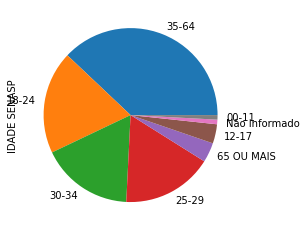

In [45]:
df_ameaca['IDADE SENASP'].value_counts().plot.pie()

##### Ocorrência de AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR por sexo

<AxesSubplot:ylabel='SEXO'>

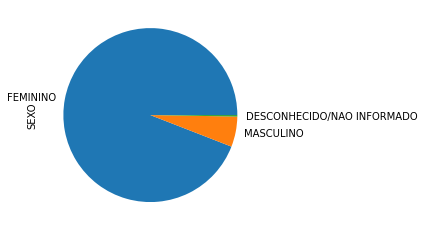

In [46]:
df_ameaca['SEXO'].value_counts().plot.pie()

##### Ocorrência de AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR por região

<AxesSubplot:ylabel='REGIAO GEOGRÁFICA'>

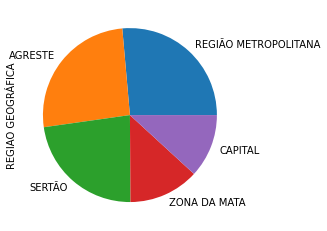

In [47]:
df_ameaca['REGIAO GEOGRÁFICA'].value_counts().plot.pie()

##### Ocorrência de AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR para os 5 município com mais ocorrências 

<AxesSubplot:>

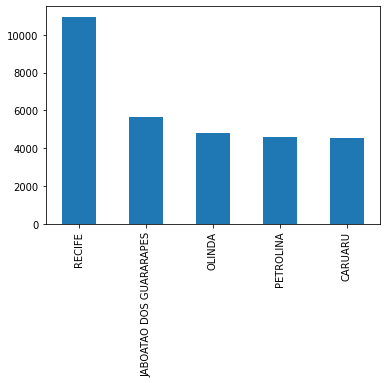

In [48]:
df_ameaca['MUNICÍPIO DO FATO'].value_counts().head().plot.bar()

### Análise dos casos da região Metropolitana

In [49]:
df_metropolitana= df[ df['REGIAO GEOGRÁFICA'] == 'REGIÃO METROPOLITANA' ]
df_metropolitana

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO,ano/mes
12,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA,2015-01-01,2015,FEMININO,18-24,1,1,2015-01
13,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA,2015-01-01,2015,FEMININO,30-34,1,1,2015-01
14,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,INJÚRIA,2015-01-01,2015,FEMININO,18-24,1,1,2015-01
15,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,LESÃO CORPORAL,2015-01-01,2015,FEMININO,30-34,1,1,2015-01
16,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,LESÃO CORPORAL,2015-01-01,2015,FEMININO,35-64,1,1,2015-01
...,...,...,...,...,...,...,...,...,...,...
253670,OLINDA,REGIÃO METROPOLITANA,OUTROS CRIMES,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253674,PAULISTA,REGIÃO METROPOLITANA,LESÃO CORPORAL,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253675,PAULISTA,REGIÃO METROPOLITANA,LESÃO CORPORAL,2022-08-31,2022,MASCULINO,35-64,1,8,2022-08
253676,PAULISTA,REGIÃO METROPOLITANA,MAUS TRATOS,2022-08-31,2022,FEMININO,00-11,1,8,2022-08


<AxesSubplot:>

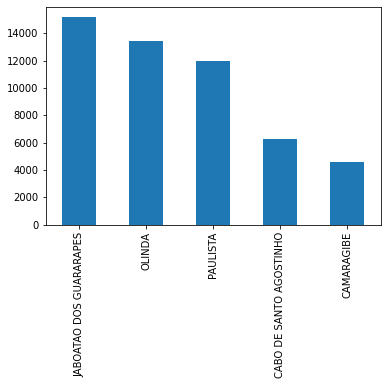

In [50]:
df_metropolitana['MUNICÍPIO DO FATO'].value_counts().head().plot.bar()

<AxesSubplot:ylabel='IDADE SENASP'>

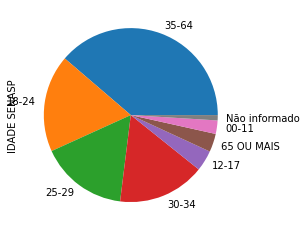

In [51]:
df_metropolitana['IDADE SENASP'].value_counts().plot.pie()

<AxesSubplot:ylabel='SEXO'>

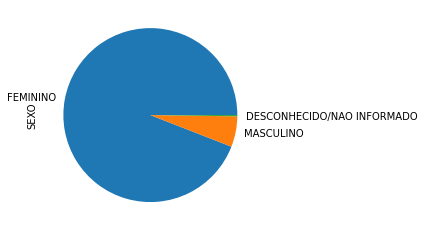

In [52]:
df_metropolitana['SEXO'].value_counts().plot.pie()

<AxesSubplot:>

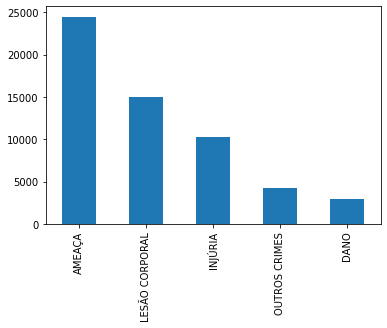

In [53]:
df_metropolitana['NATUREZA'].value_counts().head().plot.bar()

<AxesSubplot:>

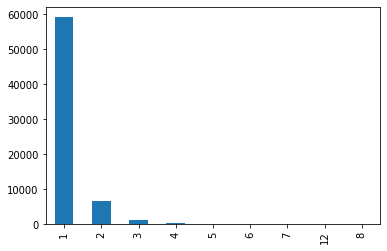

In [54]:
df_metropolitana['TOTAL DE ENVOLVIDOS'].value_counts().plot.bar()

<AxesSubplot:>

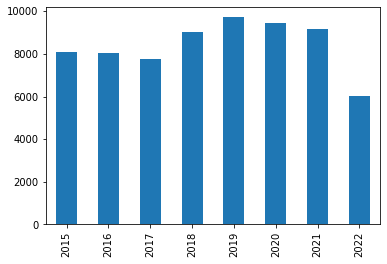

In [55]:
df_metropolitana['ANO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

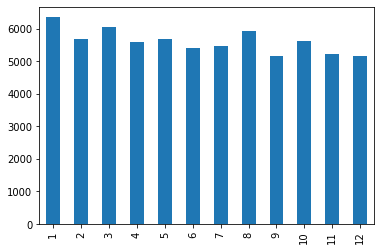

In [56]:
df_metropolitana['MÊS DO FATO'].value_counts().sort_index().plot.bar()

Filtro da naturaza do fato para sexo feminimo e idade entre 35-64 anos

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\3283658053.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[(df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64')]['NATUREZA'].value_counts().head().plot.bar()


<AxesSubplot:>

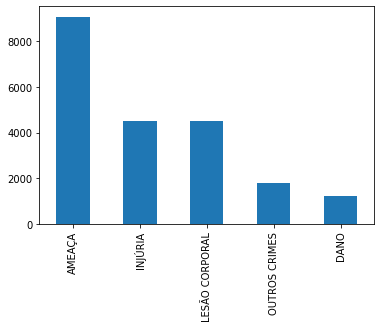

In [57]:
df_metropolitana[(df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64')]['NATUREZA'].value_counts().head().plot.bar()

In [58]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') ]['ANO'].value_counts()

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\1395458275.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') ]['ANO'].value_counts()


2021    1334
2019    1318
2020    1263
2018    1210
2015    1078
2016    1048
2017    1019
2022     801
Name: ANO, dtype: int64

Gráfico do nùmero de ocorrências do tipo Ameaça para o sexo feminino entre 35-64 por ano 

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\2109023997.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') ]['ANO'].value_counts().sort_index().plot.bar()


<AxesSubplot:>

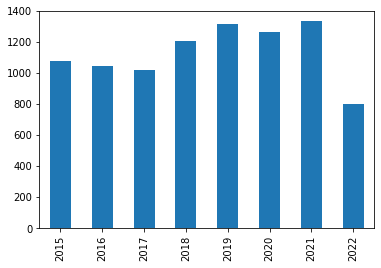

In [59]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') ]['ANO'].value_counts().sort_index().plot.bar()

In [60]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts()

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\3617380928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts()


9     86
10    84
4     80
8     80
11    79
3     78
5     76
1     75
12    75
6     72
7     67
2     64
Name: MÊS DO FATO, dtype: int64

Gráfico do número de ocorrências por mês no ano de 2021 para sexo feminino e idade entre 35-64 anos  

<AxesSubplot:>

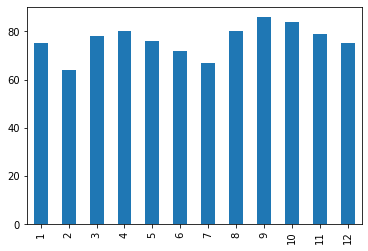

In [61]:
df_metropolitana[ (df_metropolitana['SEXO'] == 'FEMININO') & (df_metropolitana['IDADE SENASP'] == '35-64') &  (df_metropolitana['TOTAL DE ENVOLVIDOS'] == 1) & (df_metropolitana['NATUREZA'] =='AMEAÇA') & (df_metropolitana['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()

## Análise dos casos da região Agreste

In [62]:
df_agreste =df[ df['REGIAO GEOGRÁFICA'] == 'AGRESTE' ]
df_agreste

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO,ano/mes
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL,2015-01-01,2015,FEMININO,12-17,1,1,2015-01
4,ALAGOINHA,AGRESTE,AMEAÇA,2015-01-01,2015,FEMININO,35-64,1,1,2015-01
5,ALAGOINHA,AGRESTE,DIFAMAÇÃO,2015-01-01,2015,FEMININO,35-64,1,1,2015-01
7,ANGELIM,AGRESTE,LESÃO CORPORAL,2015-01-01,2015,FEMININO,35-64,1,1,2015-01
8,BELO JARDIM,AGRESTE,LESÃO CORPORAL,2015-01-01,2015,FEMININO,18-24,1,1,2015-01
...,...,...,...,...,...,...,...,...,...,...
253691,SANTA CRUZ DO CAPIBARIBE,AGRESTE,AMEAÇA,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253692,SANTA CRUZ DO CAPIBARIBE,AGRESTE,LESÃO CORPORAL,2022-08-31,2022,FEMININO,18-24,1,8,2022-08
253693,SANTA CRUZ DO CAPIBARIBE,AGRESTE,LESÃO CORPORAL,2022-08-31,2022,FEMININO,35-64,1,8,2022-08
253694,SAO CAETANO,AGRESTE,VIAS DE FATOS,2022-08-31,2022,FEMININO,35-64,1,8,2022-08


<AxesSubplot:>

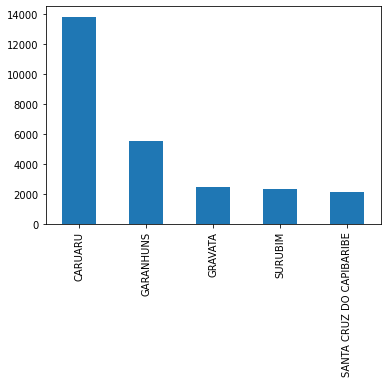

In [63]:
df_agreste['MUNICÍPIO DO FATO'].value_counts().head().plot.bar()

<AxesSubplot:>

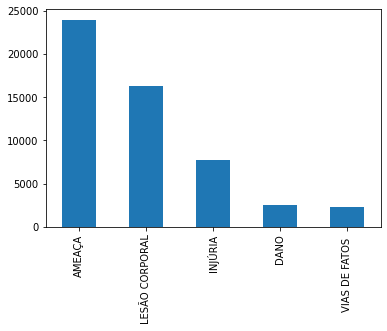

In [64]:
df_agreste['NATUREZA'].value_counts().head().plot.bar()

<AxesSubplot:ylabel='IDADE SENASP'>

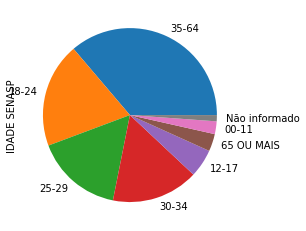

In [65]:
df_agreste['IDADE SENASP'].value_counts().plot.pie()

<AxesSubplot:ylabel='SEXO'>

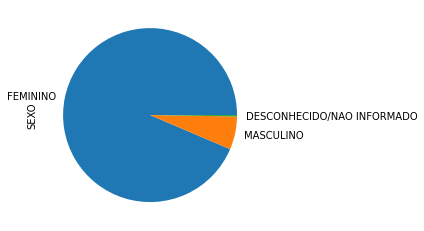

In [66]:
df_agreste['SEXO'].value_counts().plot.pie()

<AxesSubplot:>

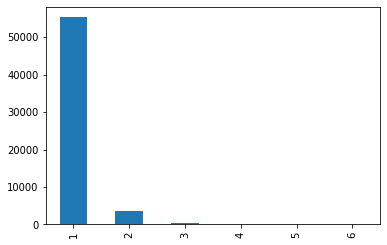

In [67]:
df_agreste['TOTAL DE ENVOLVIDOS'].value_counts().plot.bar()

<AxesSubplot:>

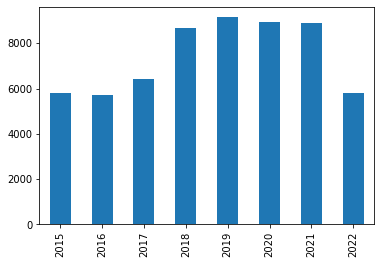

In [68]:
df_agreste['ANO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

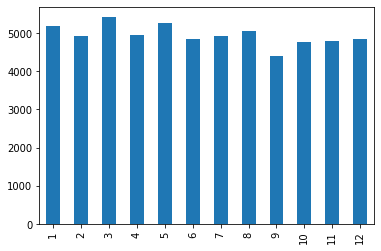

In [69]:
df_agreste['MÊS DO FATO'].value_counts().sort_index().plot.bar()

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\2106175619.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_agreste [ (df['SEXO'] == 'FEMININO') & (df['NATUREZA'] == 'AMEAÇA') & (df['IDADE SENASP'] == '35-64')]['ANO'].value_counts().sort_index().plot.bar()


<AxesSubplot:>

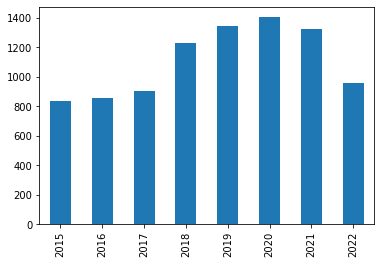

In [70]:
df_agreste [ (df['SEXO'] == 'FEMININO') & (df['NATUREZA'] == 'AMEAÇA') & (df['IDADE SENASP'] == '35-64')]['ANO'].value_counts().sort_index().plot.bar()

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\1104884378.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_agreste[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()


<AxesSubplot:>

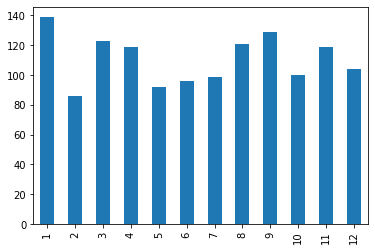

In [71]:
df_agreste[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['NATUREZA'] =='AMEAÇA') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()

## Analise dos casos da capital

In [72]:
df_capital =df[ df['REGIAO GEOGRÁFICA'] == 'CAPITAL' ]
df_capital

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO,ano/mes
69,RECIFE,CAPITAL,AMEAÇA,2015-01-01,2015,FEMININO,18-24,1,1,2015-01
70,RECIFE,CAPITAL,AMEAÇA,2015-01-01,2015,FEMININO,25-29,1,1,2015-01
71,RECIFE,CAPITAL,AMEAÇA,2015-01-01,2015,FEMININO,30-34,3,1,2015-01
72,RECIFE,CAPITAL,AMEAÇA,2015-01-01,2015,FEMININO,35-64,2,1,2015-01
73,RECIFE,CAPITAL,DANO,2015-01-01,2015,FEMININO,25-29,1,1,2015-01
...,...,...,...,...,...,...,...,...,...,...
253586,RECIFE,CAPITAL,VIAS DE FATOS,2022-08-30,2022,FEMININO,35-64,1,8,2022-08
253683,RECIFE,CAPITAL,AMEAÇA,2022-08-31,2022,FEMININO,30-34,2,8,2022-08
253684,RECIFE,CAPITAL,AMEAÇA,2022-08-31,2022,FEMININO,35-64,3,8,2022-08
253685,RECIFE,CAPITAL,INJÚRIA,2022-08-31,2022,FEMININO,35-64,1,8,2022-08


<AxesSubplot:>

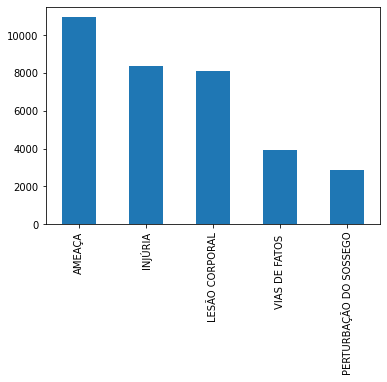

In [73]:
df_capital['NATUREZA'].value_counts().head().plot.bar()

<AxesSubplot:>

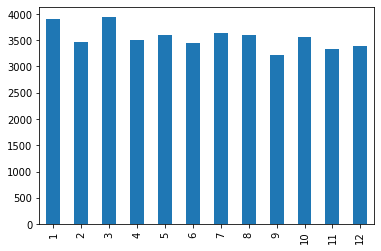

In [74]:
df_capital['MÊS DO FATO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

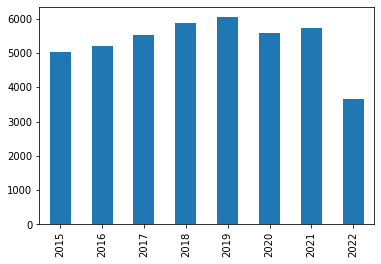

In [75]:
df_capital['ANO'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='SEXO'>

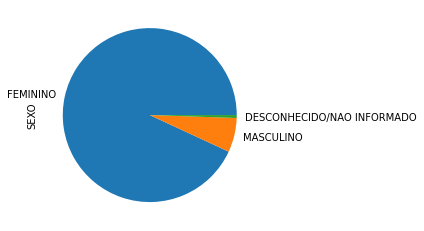

In [76]:
df_capital['SEXO'].value_counts().plot.pie()

<AxesSubplot:ylabel='IDADE SENASP'>

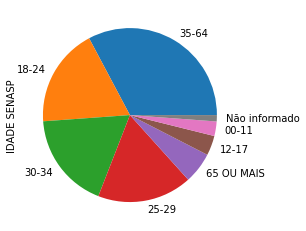

In [77]:
df_capital['IDADE SENASP'].value_counts().plot.pie()

<AxesSubplot:>

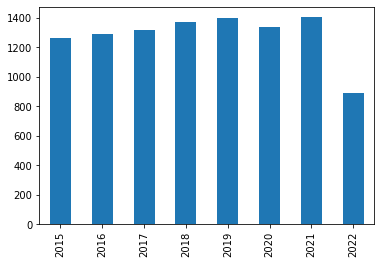

In [78]:
df_capital[ (df_capital['SEXO'] == 'FEMININO') & (df_capital['NATUREZA'] == 'AMEAÇA')]['ANO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

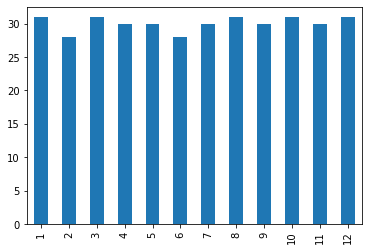

In [79]:
df_capital[ (df_capital['SEXO'] == 'FEMININO') & (df_capital['IDADE SENASP'] == '35-64') & (df_capital['NATUREZA'] =='AMEAÇA') & (df_capital['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()